# Finding Heavy Traffic Indicators on I-94

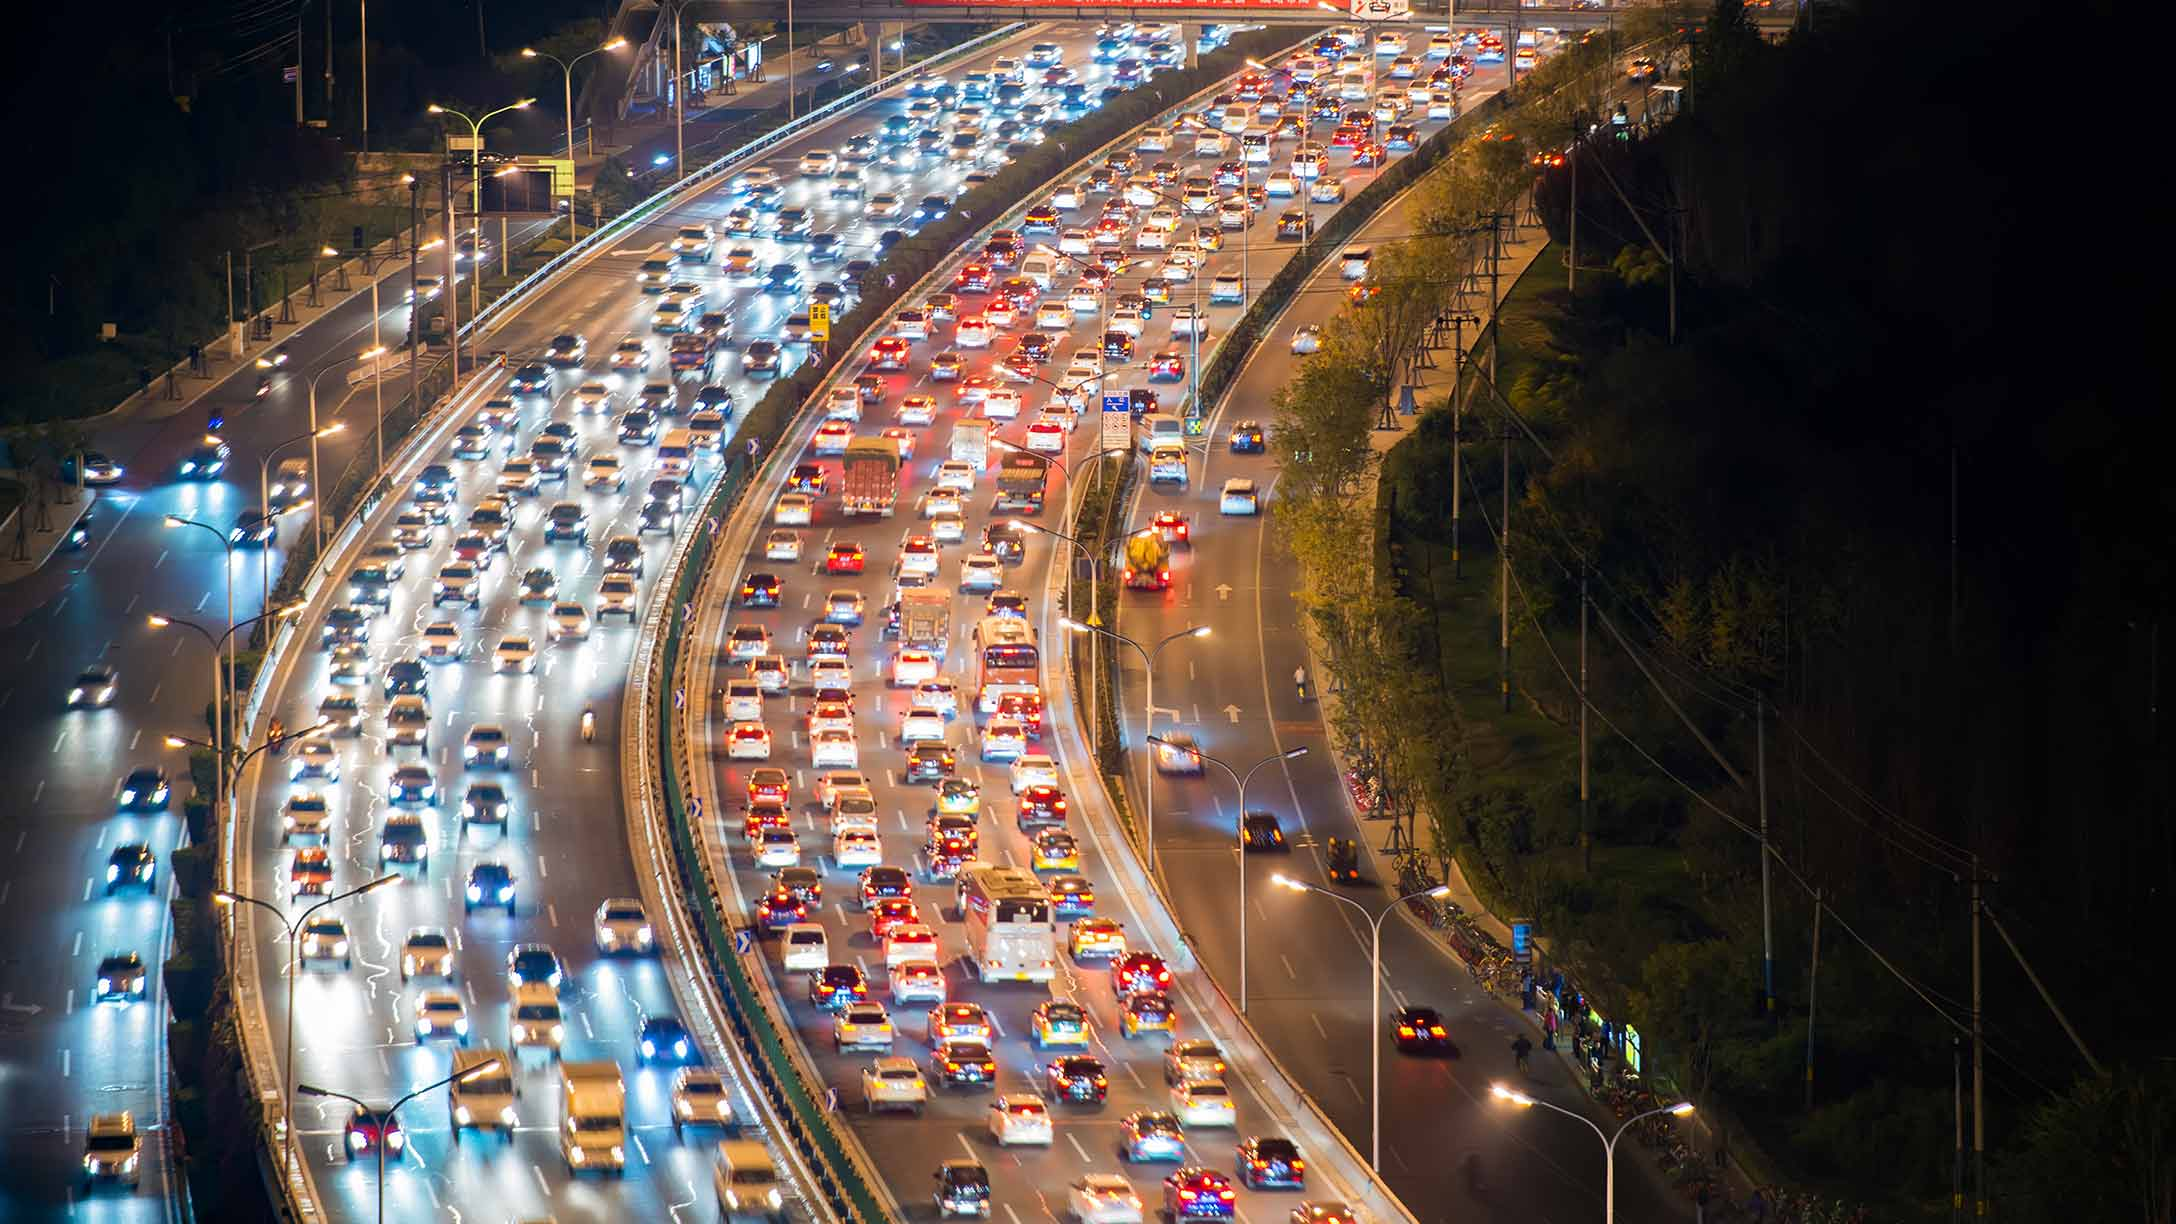

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Finding-Heavy-Traffic-Indicators-on-I-94" data-toc-modified-id="Finding-Heavy-Traffic-Indicators-on-I-94-1">Finding Heavy Traffic Indicators on I-94</a></span><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1.1">Introduction</a></span></li><li><span><a href="#Exploring-The-I-94-Traffic-Dataset" data-toc-modified-id="Exploring-The-I-94-Traffic-Dataset-1.2">Exploring The I-94 Traffic Dataset</a></span></li><li><span><a href="#Traffic-Volume-Analyis" data-toc-modified-id="Traffic-Volume-Analyis-1.3">Traffic Volume Analyis</a></span><ul class="toc-item"><li><span><a href="#Traffic-Volume:-Day-vs.-Night" data-toc-modified-id="Traffic-Volume:-Day-vs.-Night-1.3.1">Traffic Volume: Day vs. Night</a></span></li><li><span><a href="#Traffic-Volume:-Day-Vs.-Night-(II)" data-toc-modified-id="Traffic-Volume:-Day-Vs.-Night-(II)-1.3.2">Traffic Volume: Day Vs. Night (II)</a></span></li></ul></li><li><span><a href="#Time-Indicators" data-toc-modified-id="Time-Indicators-1.4">Time Indicators</a></span><ul class="toc-item"><li><span><a href="#Time-Indicators-(II)" data-toc-modified-id="Time-Indicators-(II)-1.4.1">Time Indicators (II)</a></span></li><li><span><a href="#Time-Indicators-(III)" data-toc-modified-id="Time-Indicators-(III)-1.4.2">Time Indicators (III)</a></span></li><li><span><a href="#Time-Indicators-(Summary)" data-toc-modified-id="Time-Indicators-(Summary)-1.4.3">Time Indicators (Summary)</a></span></li></ul></li><li><span><a href="#Weather-Indicators" data-toc-modified-id="Weather-Indicators-1.5">Weather Indicators</a></span><ul class="toc-item"><li><span><a href="#Weather-Types" data-toc-modified-id="Weather-Types-1.5.1">Weather Types</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-1.6">Conclusion</a></span></li></ul></li></ul></div>

## Introduction
This project will be a practice in exploratory data analysis visualizations.  

The subject will be a dataset of West-bound traffic indicators of [Interstate I-94](https://en.wikipedia.org/wiki/Interstate_94).

The goal of our analisis is to determine a few indicators of heavy traffic, such as weather, seasonality, and time.

## Exploring The I-94 Traffic Dataset

John Hogue made the dataset available, and can be downloaded from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume).

In [1]:
# import analysis libraries
import pandas as pd

import matplotlib.pyplot as plt
# allow Jupyter to display matplotlib visualizations
%matplotlib inline

In [2]:
# read in our dataset
traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

In [3]:
print(traffic.head())

  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2    None  289.58      0.0      0.0          90       Clouds   
3    None  290.13      0.0      0.0          90       Clouds   
4    None  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 12:00:00            5026  
4       broken clouds  2012-10-02 13:00:00            4918  


In [4]:
print(traffic.tail())

      holiday    temp  rain_1h  snow_1h  clouds_all  weather_main  \
48199    None  283.45      0.0      0.0          75        Clouds   
48200    None  282.76      0.0      0.0          90        Clouds   
48201    None  282.73      0.0      0.0          90  Thunderstorm   
48202    None  282.09      0.0      0.0          90        Clouds   
48203    None  282.12      0.0      0.0          90        Clouds   

          weather_description            date_time  traffic_volume  
48199           broken clouds  2018-09-30 19:00:00            3543  
48200         overcast clouds  2018-09-30 20:00:00            2781  
48201  proximity thunderstorm  2018-09-30 21:00:00            2159  
48202         overcast clouds  2018-09-30 22:00:00            1450  
48203         overcast clouds  2018-09-30 23:00:00             954  


In [5]:
print(traffic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB
None


The dataset contains 48,204 rows and 9 columns of traffic data. There are no null values. Each entry is an hourly snapshot of the traffic and weather conditions. The data is accumulated over the time period beginning October 10, 2012 through September 30, 2018. 

The data was collected via a station located roughly halfway between Minneapolis and St. Paul, Minnesota. The station only collects West-bound traffic data. Therefore, we should be cautious in generalizing the findings here since it does not consider the whole of I-94. The dataset description can be found [here](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume#).

## Traffic Volume Analyis

We'll start by looking at the distribution of the traffic volume distribution.

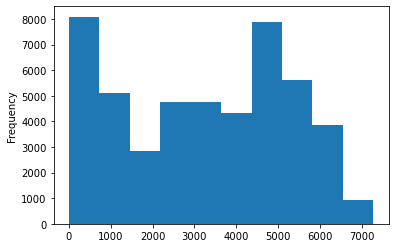

In [6]:
traffic['traffic_volume'].plot.hist()
plt.show()

In [7]:
traffic['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

From October 10, 2012 and September 30, 2018, the traffic volume had an hourly mean of 3,260 cars, with a low of 0 cars and a high of 7280 cars. 

The data is collected day and night, and seeing that 25% of the time traffic volume is around 1,193 cars per hour and 25% of the time the traffic volume is at 4,933 cars per hour, there is a regular fluctuation in volume that we may be able to link with the time of day.

### Traffic Volume: Day vs. Night

Let's start by dividing the dataset into two parts:
* Daytime data: hours from 7 a.m. to 7 p.m.
* Nighttime data: hours from 7 p.m. to 7 a.m.

While imperfect, this will give us a starting point.

In [8]:
# turn the column from object to date_time
traffic['date_time'] = pd.to_datetime(traffic['date_time'])

In [9]:
print(traffic['date_time'].head())

0   2012-10-02 09:00:00
1   2012-10-02 10:00:00
2   2012-10-02 11:00:00
3   2012-10-02 12:00:00
4   2012-10-02 13:00:00
Name: date_time, dtype: datetime64[ns]


In [10]:
# create a new series in the dataframe that is only the hour values
traffic['date_time_hour'] = traffic['date_time'].dt.hour

In [11]:
# create a dataframe that isolatesthe day
day = traffic.copy()[(traffic['date_time_hour'] >= 7) & (traffic['date_time_hour'] < 19)]
print(day.shape)
#print(day.head(20))

(23877, 10)


In [12]:
# create a dateframe that isolates the night
night = traffic.copy()[(traffic['date_time_hour'] >= 19) | (traffic['date_time_hour'] < 7)]
print(night.shape)

(24327, 10)


We would expect that these values be equal since they each represent 12 separate hours of our 24 hour day. We know, however, that there are missing hours in our dataset. The start and end hour entryt times don't begin at 0:00 and there are random missing entries, as displayed below. 

In [13]:
print(traffic['date_time'][176:178])

176   2012-10-10 03:00:00
177   2012-10-10 06:00:00
Name: date_time, dtype: datetime64[ns]


### Traffic Volume: Day Vs. Night (II)

Using the isolated day and night objects, we will now create histograms to represent each.

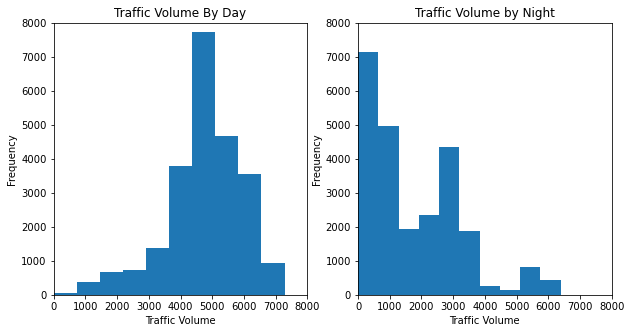

In [14]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
plt.hist(day['traffic_volume'])
plt.title('Traffic Volume By Day')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.ylim(0,8000)
plt.xlim(0,8000)

plt.subplot(1,2,2)
plt.hist(night['traffic_volume'])
plt.title('Traffic Volume by Night')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.ylim(0, 8000)
plt.xlim(0, 8000)
plt.show()

In [15]:
print('day','\n',day['traffic_volume'].describe())
print('\n')
print('night','\n',night['traffic_volume'].describe())

day 
 count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64


night 
 count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64


The traffic volume by day graph is left skewed, indicating that most of the larger volume values have an increased occurence. During the day there are 4,252 cars or more passing through the the station each hour 75% of the time. 

The traffic volume by night graph is right skewed, indicating that most of the smaller volume values have an increased occurence. During the night there are 2,819 cars or fewer passing through the station each hour 75% of the time. 

While the max of the night data set is 6,386, the traffic is generally low volume. Because our goal is to find indicators of heavy traffic, we will only focus on the daytime data.

## Time Indicators

One of the possible indicators of heavy traffic is time. There might be more people on the road in a certain  month, on a certain day, or at a certain time of the day.

We're going to look at a few line plots showing how the traffic volume changed according to the following parameters:
* Month
* Day of the Week
* Time of day

In [16]:
day['month'] = day['date_time'].dt.month # create a new column where each value describes the month when the measurement was taken
by_month = day.groupby('month').mean() #create an object that groups the dataset by month column with mean as the aggregate function
by_month['traffic_volume']

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

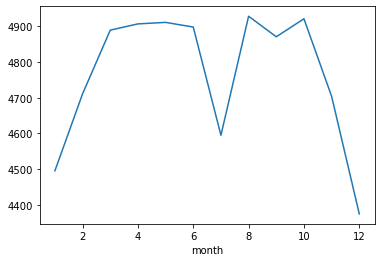

In [17]:
by_month['traffic_volume'].plot.line()
plt.show()

The line chart shows the frequency over our months has a range between 4,300 and 5,000. The winter months of January, February, November and December have lower frequencies, while the warmer Spring, Summer, and Fall months, generally, have traffic volume of traffic. The exceptioin being July, which see a plunge below 4,900.

Since our data spans multiple years, let's see if July is an exception every year or if there is an outlier.

In [18]:
m_july = day.copy()[day['month'] == 7]
m_july['year'] = m_july['date_time'].dt.year
by_year = m_july.groupby(m_july['year']).mean()
print(by_year['traffic_volume'])

year
2013    4914.354054
2014    4871.598240
2015    4613.146226
2016    3924.923645
2017    4734.120301
2018    4586.899543
Name: traffic_volume, dtype: float64


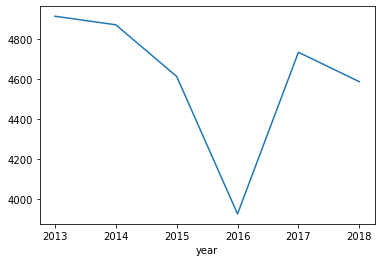

In [19]:
by_year['traffic_volume'].plot.line()
plt.show()

2016 was an exception year, 600-800 fewer than our other years, and brought down our average. A [Google Search](https://www.google.com/search?q=i94&source=lnt&tbs=cdr%3A1%2Ccd_min%3A7%2F1%2F2016%2Ccd_max%3A8%2F1%2F2016&tbm=) shows us that there may have been protests that limited I94 traffic near St. Paul during July of 2016.

We can therefore make the assertion that in Winter months there is less traffic than in Warmer months.

### Time Indicators (II)

We will now look at day of the week.

In [20]:
day['dayofweek'] = day['date_time'].dt.dayofweek # create a new column that tells us the day of the week
by_dayofweek = day.groupby('dayofweek').mean() # group our rows by the day of the week they fall in and take the mean for each column at each grouping
by_dayofweek['traffic_volume'] # 0 is Monday, 6 is Sunday

dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

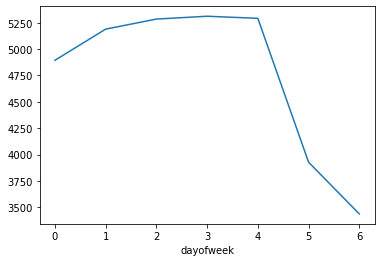

In [21]:
by_dayofweek['traffic_volume'].plot.line()
plt.show()

There is a relatively consistent volume of traffic Monday through Friday, and a significant dropoff on the weekend, Saturday and Sunday. Of the weekdays, Monday is slightly less the rest, being the only grouping falling below an average traffic volume of 5,000. Both weekend days fall below 4,000.

### Time Indicators (III)

We will now generate a line plot for the time of day, however, we will separate the analysis of weekdays and weekends to avoid skewing the results.

First we will create a weekend and weekday dataframes.

In [22]:
day['hour'] = day['date_time'].dt.hour # create the hour column in the day dataframe
weekday = day.copy()[day['dayofweek'] <= 4] # create weekday dataframe
weekend = day.copy()[day['dayofweek'] > 4] # create weekend dataframe

In [23]:
by_hour_weekday = weekday.groupby(['hour']).mean()
by_hour_weekend = weekend.groupby(['hour']).mean()

In [24]:
#print(by_hour_weekday['traffic_volume'])
#print(by_hour_weekend['traffic_volume'])

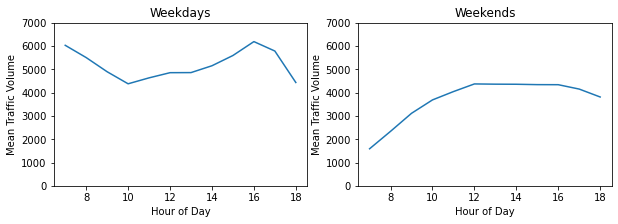

In [25]:
#Create two charts comparing weekend and weekday traffic volume by hour
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.plot(by_hour_weekday['date_time_hour'],by_hour_weekday['traffic_volume'])
plt.title('Weekdays')
plt.ylabel('Mean Traffic Volume')
plt.xlabel('Hour of Day')
plt.ylim(0,7000)
plt.subplot(1,2,2)
plt.plot(by_hour_weekend['date_time_hour'], by_hour_weekend['traffic_volume'])
plt.title('Weekends')
plt.ylabel('Mean Traffic Volume')
plt.xlabel('Hour of Day')
plt.ylim(0,7000)
plt.show()

Comparing the graphs we see that all the hours on weekdays have more traffic volume than on weekends. During weekdays we see a concave up pattern, which tells us that, as we might expect, rush hour has an impact on traffic volume. We see a concave down pattern on the weekends, which tells us that people start their day later.

### Time Indicators (Summary)

We found a few indicators that are time related:
* Traffic is usually heavier in warm months than in cold months.
* Traffic is usually heavier on weekdays compared to weekends.
* On weekdays, the rush hours are around 7 and 16 (4:00pm).

## Weather Indicators

Another possible indicator of heavy traffic is weather. The dataset provides us with a few useful columns about weather: _temp_, _rain_1h_, _snow_1h_, _clouds_all_, _weather_main_, _weather_description_.

A few of these columns are numerical so let's start by looking up their correlation values with _traffic_volume_.

In [26]:
day.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
date_time_hour    0.172704
month            -0.022337
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

Temperature has the strongest correlation to _traffic_volume_ with a p value at 0.128. The other numerical weather indicators do not show a strong correlation with _traffic_volume_.

To visualize the correlation, we will create a scatter plot below.

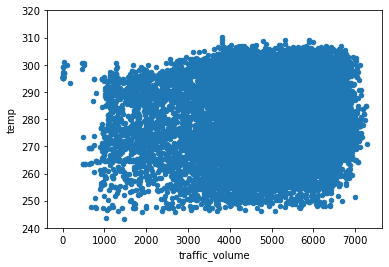

In [27]:
day.plot.scatter('traffic_volume','temp')
plt.ylim(240,320)
plt.show()

Temperature also does not look like a reliable indicator of _traffic_volume_.

### Weather Types

Next we will evaluate the categorical weather-related columns: _weather_main_ and _weather_description_.

Let's create bar charts for both, starting with _weather_main_.

In [28]:
by_weather_main = day.groupby('weather_main').mean()
by_weather_description = day.groupby('weather_description').mean()

<AxesSubplot:ylabel='weather_main'>

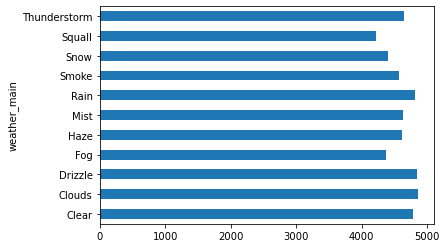

In [29]:
by_weather_main['traffic_volume'].plot.barh()

None of the main weather groupings exceed 5,000, and therefore are not great indicators for increased _traffic_volume_.

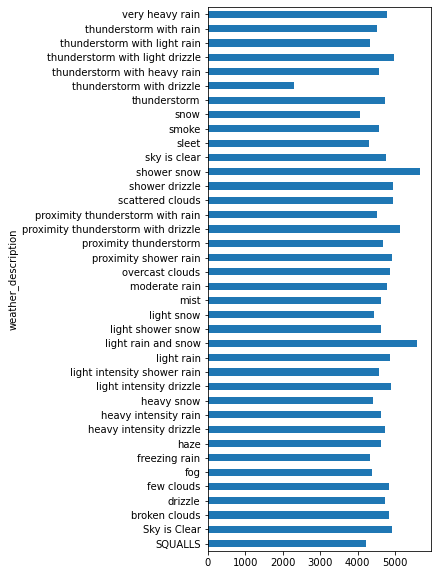

In [30]:
plt.figure(figsize=(4, 10))
plt.subplot(1,1,1)
by_weather_description['traffic_volume'].plot.barh()

plt.show()

Only two weather types exceed 5,000 _traffic_volume_: shower snow and light rain and snow.

It is difficult to make any definitive conslusions as to why these two types break through 5,000 while others do not.

## Conclusion

In this project, we tried to find a few indicators of heavy traffic on I-94. We managed to find two types of indicators:

* Time Indicators
    * Traffic is usually heavier in warm months compared to cold months.
    * Traffic is usually heavier on weekdays compared to weekends.
    * On weekdays around 7 and 16 (4:00 pm)
* Weather Indicators
    * Shower snow
    * Light rain and snow